In [74]:
import pandas as pd
import numpy as np

# Read the CSV file with encoding
try:
    df = pd.read_csv('cancer.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('cancer.csv', encoding='windows-1252')
    except Exception as e:
        print("Error:", e)

## Print Basic Information and Summary Statistics

In [75]:
if 'df' in locals():
    print(df.head())
    print(df.info())
    print(df.describe())
    print(df['0'].value_counts())
else:
    print("Failed to read the file with specified encodings.")


   Unnamed: 0               0  \
0           0  Thyroid_Cancer   
1           1  Thyroid_Cancer   
2           2  Thyroid_Cancer   
3           3  Thyroid_Cancer   
4           4  Thyroid_Cancer   

                                                   a  
0  Thyroid surgery in  children in a single insti...  
1  " The adopted strategy was the same as that us...  
2  coronary arterybypass grafting thrombosis ï¬b...  
3   Solitary plasmacytoma SP of the skull is an u...  
4   This study aimed to investigate serum matrix ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.6+ KB
None
        Unnamed: 0
count  7570.000000
mean   3784.500000
std    2185.415102
min       0.000000
25%    1892.2

## Clean the data

In [76]:
# Drop the unnecessary index column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Rename the columns for clarity
df.columns = ['Cancer_Type', 'Description']

# Verify the changes by printing the first few rows and the column distribution
print(df.head())
print(df['Cancer_Type'].value_counts())

      Cancer_Type                                        Description
0  Thyroid_Cancer  Thyroid surgery in  children in a single insti...
1  Thyroid_Cancer  " The adopted strategy was the same as that us...
2  Thyroid_Cancer  coronary arterybypass grafting thrombosis ï¬b...
3  Thyroid_Cancer   Solitary plasmacytoma SP of the skull is an u...
4  Thyroid_Cancer   This study aimed to investigate serum matrix ...
Cancer_Type
Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: count, dtype: int64


## Drop duplicate rows

In [77]:
# Count the number of duplicate rows in the entire DataFrame
num_duplicates = df.duplicated().sum()

# Print out the count of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 6574


In [78]:
# Drop the duplicate rows
df = df.drop_duplicates()

# Count the number of remaining duplicate rows (should be zero)
remaining_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows after dropping: {remaining_duplicates}")

# Optionally, print the number of rows after cleaning
print(f"Number of rows after removing duplicates: {len(df)}")

Number of duplicate rows after dropping: 0
Number of rows after removing duplicates: 996


## Clean text column

In [79]:
import re
import string

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[{}]+'.format(string.punctuation), ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Assuming df is your DataFrame and it has been loaded properly
df['Cleaned_Description'] = df['Description'].apply(clean_text)

# Print the first few rows to see the cleaning results
print(df[['Description', 'Cleaned_Description']].head())

                                         Description  \
0  Thyroid surgery in  children in a single insti...   
1  " The adopted strategy was the same as that us...   
2  coronary arterybypass grafting thrombosis ï¬b...   
3   Solitary plasmacytoma SP of the skull is an u...   
4   This study aimed to investigate serum matrix ...   

                                 Cleaned_Description  
0  thyroid surgery in children in a single instit...  
1  the adopted strategy was the same as that used...  
2  coronary arterybypass grafting thrombosis ï¬b...  
3  solitary plasmacytoma sp of the skull is an un...  
4  this study aimed to investigate serum matrix m...  


### Remove stop words in text column

In [80]:
import nltk
from nltk.corpus import stopwords

# Download the list of stopwords
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply the function to remove stopwords
df['Cleaned_Description'] = df['Cleaned_Description'].apply(remove_stopwords)

# Print to check text after removing stopwords
print(df[['Description', 'Cleaned_Description']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siripuramsaibharadwaj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         Description  \
0  Thyroid surgery in  children in a single insti...   
1  " The adopted strategy was the same as that us...   
2  coronary arterybypass grafting thrombosis ï¬b...   
3   Solitary plasmacytoma SP of the skull is an u...   
4   This study aimed to investigate serum matrix ...   

                                 Cleaned_Description  
0  thyroid surgery children single institution os...  
1  adopted strategy used prior years based four e...  
2  coronary arterybypass grafting thrombosis ï¬b...  
3  solitary plasmacytoma sp skull uncommon clinic...  
4  study aimed investigate serum matrix metallopr...  


## Exploratory Data Analysis

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

In [82]:
# Print the shape of the dataset and basic info
print("Data shape:", df.shape)
print(df.info())

Data shape: (996, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 7497
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Cancer_Type          996 non-null    object
 1   Description          996 non-null    object
 2   Cleaned_Description  996 non-null    object
dtypes: object(3)
memory usage: 31.1+ KB
None


### Plot the distribution of cancer types

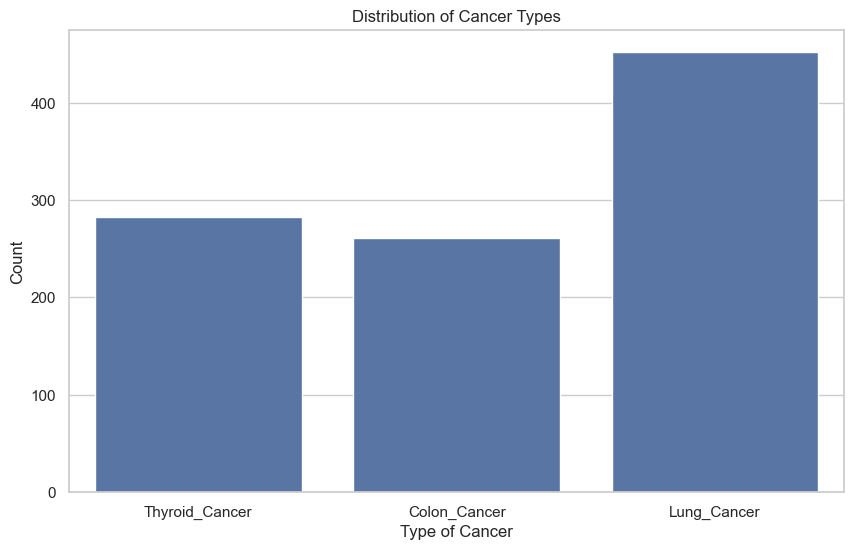

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cancer_Type')
plt.title('Distribution of Cancer Types')
plt.xlabel('Type of Cancer')
plt.ylabel('Count')
plt.show()


### Plot the distribution of text length & distribution by cancer types

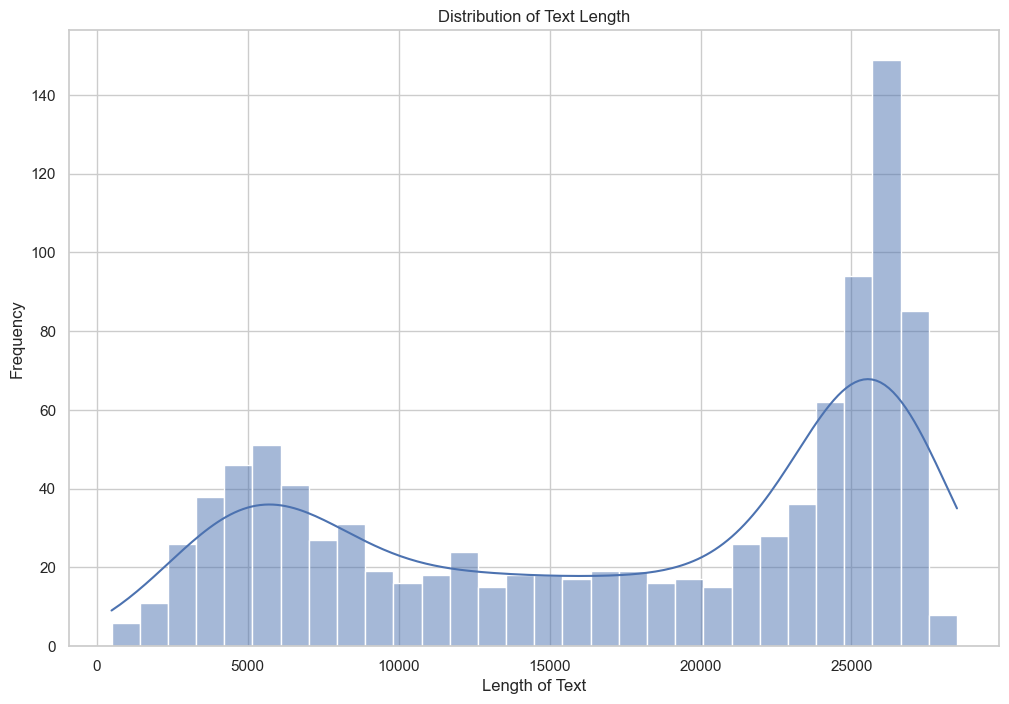

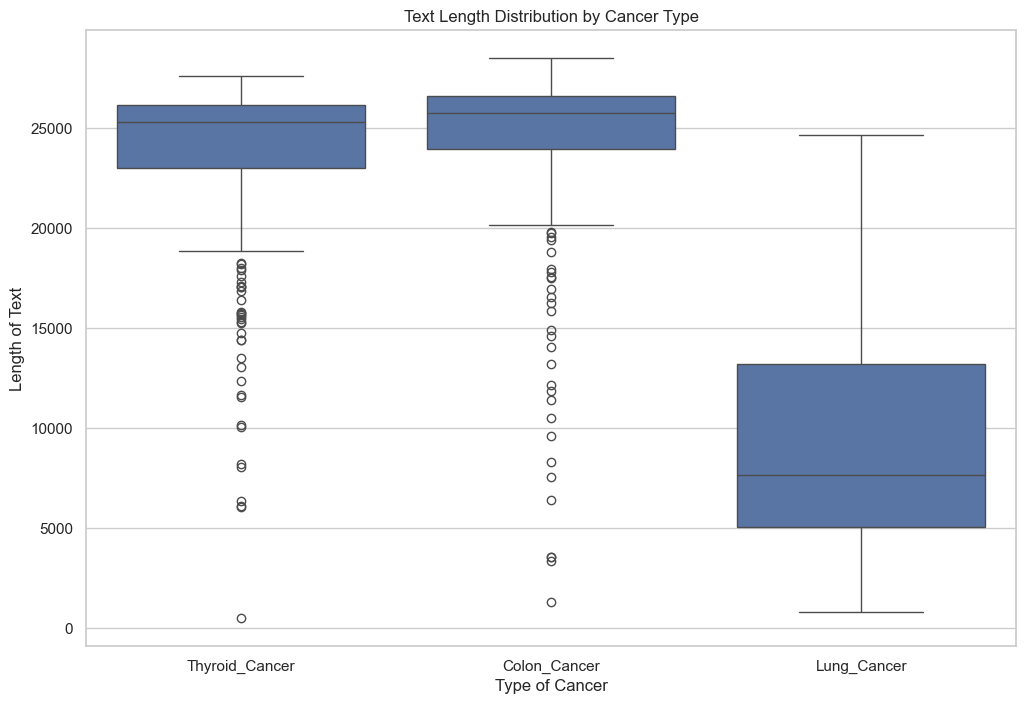

In [84]:
# Add a new column for text length
df['Text_Length'] = df['Cleaned_Description'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(12, 8))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

# Boxplot to see text length distribution by cancer type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cancer_Type', y='Text_Length', data=df)
plt.title('Text Length Distribution by Cancer Type')
plt.xlabel('Type of Cancer')
plt.ylabel('Length of Text')
plt.show()


## Vectorize the text column

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words='english')

# Fit and transform the 'Cleaned_Description' column
X = tfidf.fit_transform(df['Cleaned_Description']).toarray()

# Target variable
y = df['Cancer_Type']

## Test Train Split

In [86]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define and train 3 classification models

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and predict with each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = (model, y_pred)

## Print evaluation metrics of models

In [88]:
for name, (model, y_pred) in results.items():
    print(f"Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Results for Logistic Regression:
Accuracy: 0.74
Classification Report:
                precision    recall  f1-score   support

  Colon_Cancer       0.67      0.44      0.53        55
   Lung_Cancer       0.88      0.98      0.93        89
Thyroid_Cancer       0.57      0.66      0.61        56

      accuracy                           0.74       200
     macro avg       0.70      0.69      0.69       200
  weighted avg       0.73      0.74      0.73       200

Confusion Matrix:
[[24  4 27]
 [ 1 87  1]
 [11  8 37]]


Results for Random Forest:
Accuracy: 0.795
Classification Report:
                precision    recall  f1-score   support

  Colon_Cancer       0.66      0.60      0.63        55
   Lung_Cancer       0.96      1.00      0.98        89
Thyroid_Cancer       0.65      0.66      0.65        56

      accuracy                           0.80       200
     macro avg       0.76      0.75      0.75       200
  weighted avg       0.79      0.80      0.79       200

Confusion Matrix

## Expanding TF-IDF with Bi-grams

In [89]:
tfidf = TfidfVectorizer(max_features=3000, min_df=5, max_df=0.7, stop_words='english', ngram_range=(1,2))
X = tfidf.fit_transform(df['Cleaned_Description']).toarray()

## Hyperparameter Tuning using Random Forest

In [90]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Predict and evaluate using the best model
y_pred = best_model.predict(X_test)
print("Improved Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_depth=None, 